In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from io_utils import model_dict, get_best_file
import backbone
from methods.maml import MAML
from data.datamgr import SetDataManager
import configs

Conv4
Conv4S
Conv6


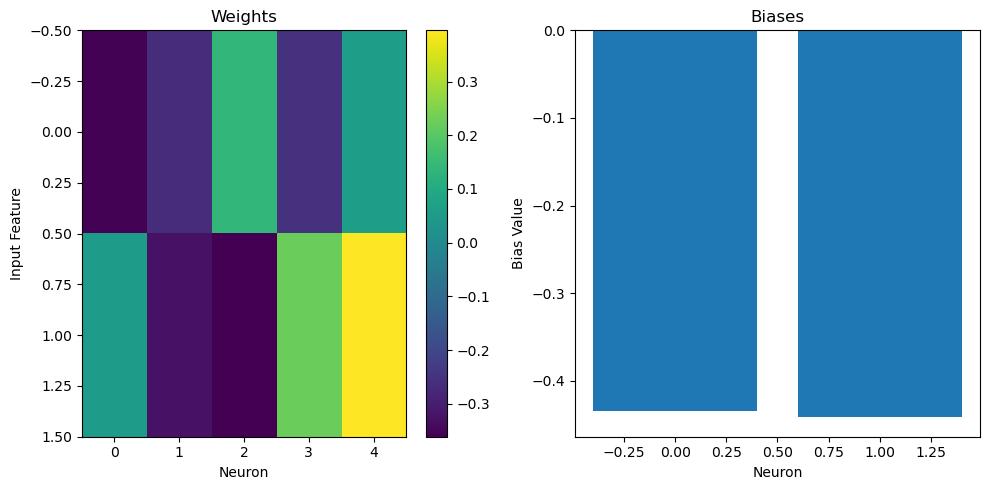

In [2]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model and move it to the device if needed
model = SimpleNN()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# Assuming the model has been trained and you want to visualize the last layer parameters
# In this case, the last layer is self.fc2
last_layer = model.fc2

# Extract the weight and bias
weights = last_layer.weight.data.cpu().numpy()
biases = last_layer.bias.data.cpu().numpy()

# Visualize the weights
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Weights")
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("Neuron")
plt.ylabel("Input Feature")

# Visualize the biases
plt.subplot(1, 2, 2)
plt.title("Biases")
plt.bar(range(len(biases)), biases)
plt.xlabel("Neuron")
plt.ylabel("Bias Value")

plt.tight_layout()
plt.show()


In [3]:
nn_model = "Conv4"

backbone.ConvBlock.maml = True
backbone.SimpleBlock.maml = True
backbone.BottleneckBlock.maml = True
backbone.ResNet.maml = True
few_shot_params = dict(n_way = 5 , n_support = 1)
model = MAML(  model_dict[nn_model], approx = False , **few_shot_params )

model = model.to(device)
print(f"Total number of params in model : {sum(p.numel() for p in model.parameters())}")
print(f"Number of weights in last layer : {sum(p.numel() for p in list(model.parameters())[-2])}")

Conv4
Inner lr : 0.01
Total number of params in model : 121093
Number of weights in last layer : 8000


In [4]:
image_size = 84 
datamgr         = SetDataManager(image_size, n_eposide = 600, n_query = 15 , **few_shot_params)
loadfile  = configs.data_dir['CUB'] + 'novel' +'.json' 
novel_loader     = datamgr.get_data_loader( loadfile, aug = False)

In [5]:
def load_from_checkpoint(model, nn_model):
    checkpoint_dir = f'save/checkpoints/CUB/{nn_model}_maml_aug_5way_1shot'
    modelfile   = get_best_file(checkpoint_dir)
    tmp = torch.load(modelfile)
    model.load_state_dict(tmp['state'])

load_from_checkpoint(model, nn_model)

# Last layer visualization of MAML without adaptation

[[ 0.00939002 -0.00028442  0.00405601 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02470574  0.01486059 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00357532  0.00878356 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00402108 -0.00895536 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.00596863  0.00421561 ...  0.00574416 -0.01379629
  -0.01378049]]
[-0.00081691  0.01233515 -0.00051079 -0.0037819   0.0064649 ]


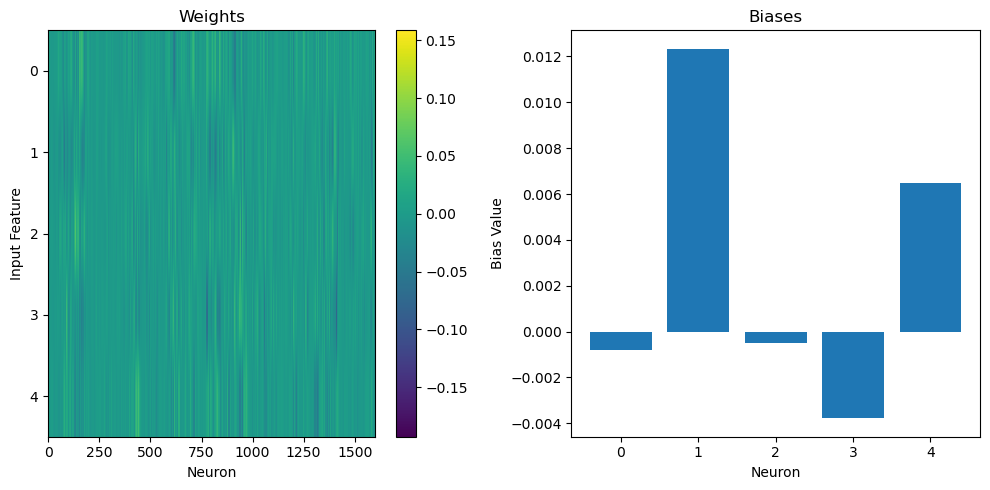

In [6]:
# Assuming the model has been trained and you want to visualize the last layer parameters
# In this case, the last layer is self.fc2
last_layer = model.classifier

# Extract the weight and bias
weights = last_layer.weight.data.cpu().numpy()
biases = last_layer.bias.data.cpu().numpy()

print(weights)
print(biases)

# Visualize the weights
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Weights")
plt.imshow(weights, aspect='auto', cmap='viridis')
plt.colorbar()
plt.xlabel("Neuron")
plt.ylabel("Input Feature")

# Visualize the biases
plt.subplot(1, 2, 2)
plt.title("Biases")
plt.bar(range(len(biases)), biases)
plt.xlabel("Neuron")
plt.ylabel("Bias Value")

plt.tight_layout()
plt.show()


# After 100 steps adaptation

In [7]:
model.eval()

MAML(
  (feature): ConvNet(
    (trunk): Sequential(
      (0): ConvBlock(
        (C): Conv2d_fw(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (BN): BatchNorm2d_fw(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (trunk): Sequential(
          (0): Conv2d_fw(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d_fw(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )
      )
      (1): ConvBlock(
        (C): Conv2d_fw(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (BN): BatchNorm2d_fw(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (pool): MaxPool2d(kernel_

In [8]:
model.task_update_num = 100
print(model.task_update_num)
print(model.train_lr)

100
0.01


Weights : [[ 0.00939002 -0.00182887  0.00939911 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02304226  0.01167055 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00247068  0.008938   ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.01150828 -0.00693397 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.00914326 -0.00011327 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00260125  0.01304506 -0.00156708 -0.00311139  0.0079251 ]
Difference of initial vs adaptated weights in norm : 0.46170562505722046


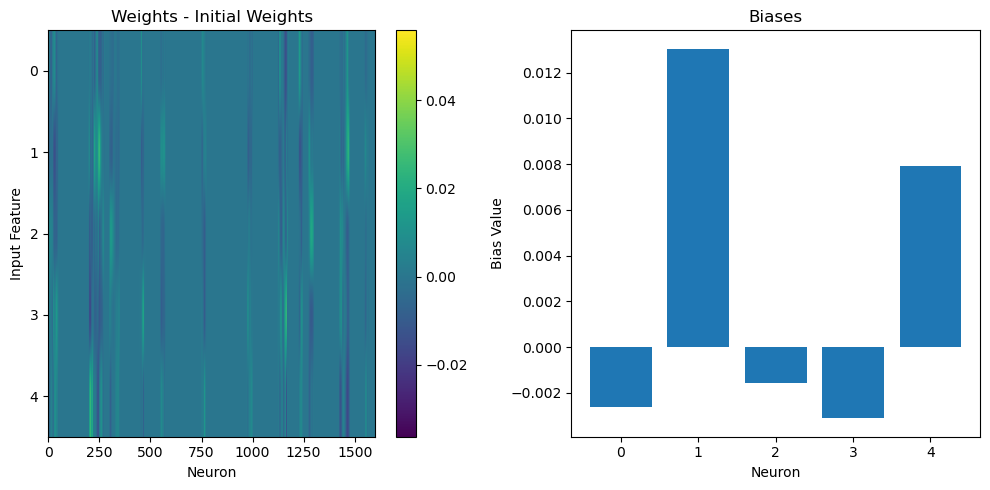

Weights : [[ 9.3900235e-03  2.4472135e-03 -4.0496406e-03 ...  3.4348786e-02
   1.5775396e-02  5.9640491e-03]
 [-1.9993104e-02  2.3805156e-02  1.9680141e-02 ...  7.8740064e-03
  -1.9266661e-03  4.3810252e-03]
 [ 8.4794164e-03  4.3073487e-05  3.8869656e-03 ... -3.8937302e-03
  -2.7480382e-02  1.6476005e-02]
 [-1.0438536e-03 -3.0572461e-03 -1.6386433e-02 ... -8.0120362e-02
  -2.6344325e-02 -1.9429436e-02]
 [-4.1720634e-03  2.8108887e-03  1.9829385e-02 ...  5.7441620e-03
  -1.3796289e-02 -1.3780488e-02]]
Biases : [-0.00161452  0.01097435 -0.00042405 -0.00387412  0.00862879]
Difference of initial vs adaptated weights in norm : 0.4989011883735657


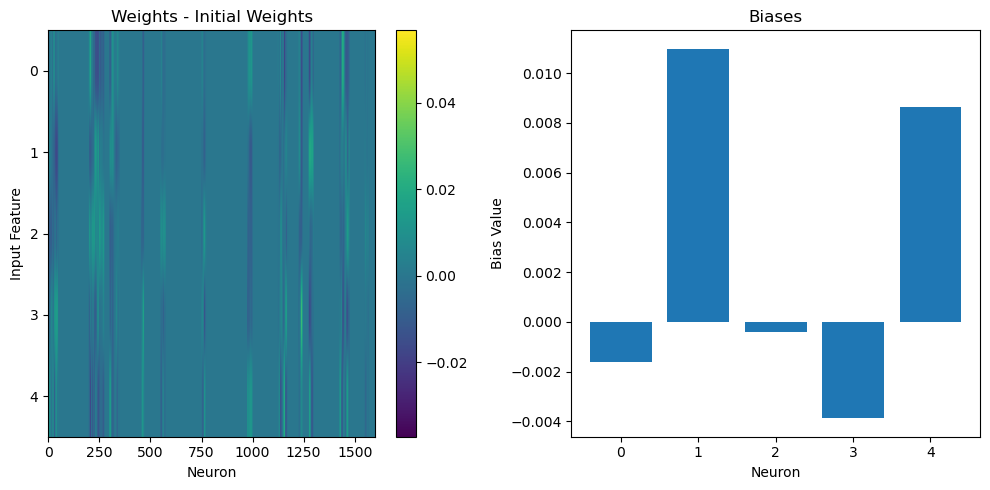

Weights : [[ 0.00939002  0.00292698  0.00278032 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02636291  0.01772479 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00077383  0.00718206 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00095246 -0.01184745 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.0049671   0.00712069 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [ 0.00028036  0.01385239 -0.00173098 -0.00394154  0.00523021]
Difference of initial vs adaptated weights in norm : 0.4562018811702728


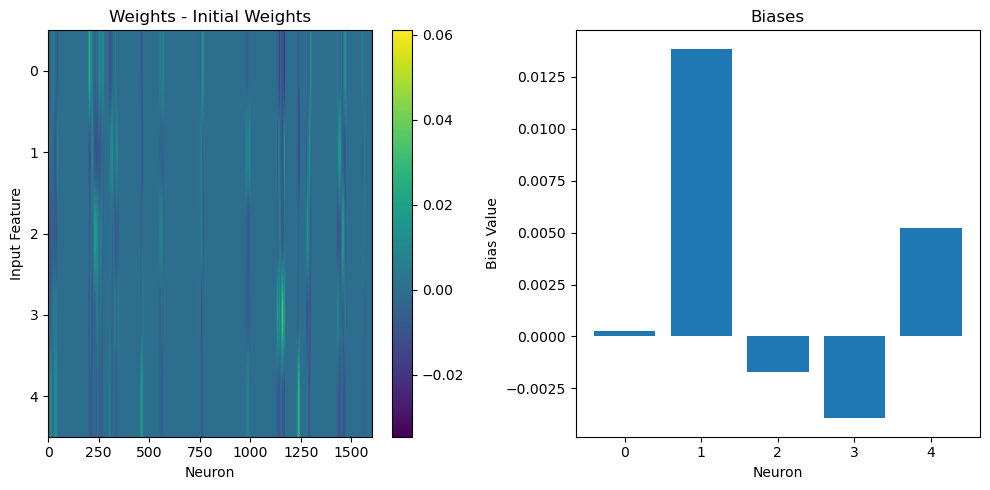

Weights : [[ 0.00939002  0.00963592  0.00067507 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02142029  0.01190938 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00015929  0.01717008 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00058097 -0.01139148 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.00574738  0.00459737 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [ 0.00042561  0.01183516 -0.0014772  -0.00276461  0.00567148]
Difference of initial vs adaptated weights in norm : 0.4785151779651642


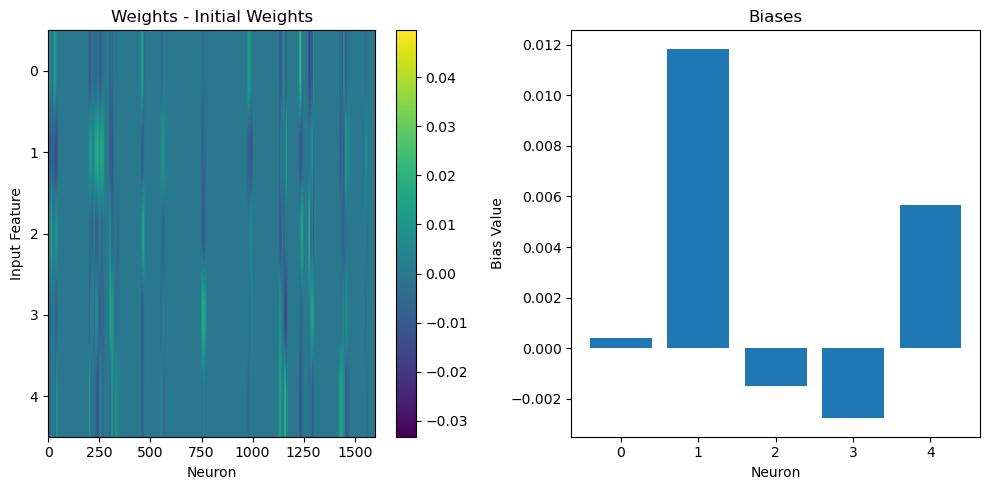

Weights : [[ 9.3900235e-03 -2.8611948e-03  1.4878944e-03 ...  3.4348786e-02
   1.5775396e-02  5.9640491e-03]
 [-1.9993104e-02  2.0895580e-02  1.1412471e-02 ...  7.8740064e-03
  -1.9266661e-03  4.3810252e-03]
 [ 8.4794164e-03 -9.5727773e-07  5.6050974e-03 ... -3.8937302e-03
  -2.7480382e-02  1.6476005e-02]
 [-1.0438536e-03  1.8636657e-02  7.3944405e-03 ... -8.0120362e-02
  -2.6344325e-02 -1.9429436e-02]
 [-4.1720634e-03 -1.0621007e-02 -2.9394792e-03 ...  5.7441620e-03
  -1.3796289e-02 -1.3780488e-02]]
Biases : [-0.00186587  0.0128545  -0.00040951 -0.00387133  0.00698267]
Difference of initial vs adaptated weights in norm : 0.483634352684021


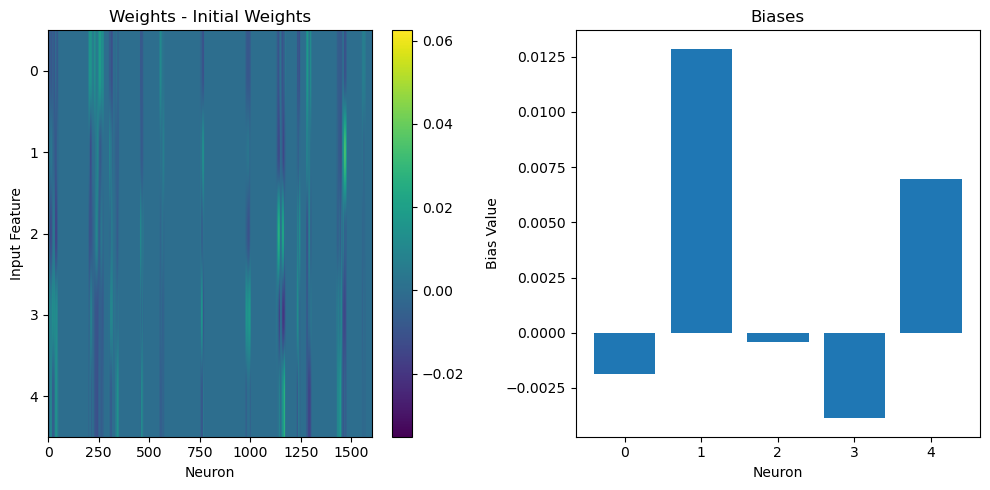

Weights : [[ 0.00939002 -0.00749485 -0.00275744 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02095727  0.01746038 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00169067  0.0018154  ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00736637 -0.00192461 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206  0.00352962  0.00836669 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00152321  0.01431084 -0.0010339  -0.00426485  0.00620156]
Difference of initial vs adaptated weights in norm : 0.47587665915489197


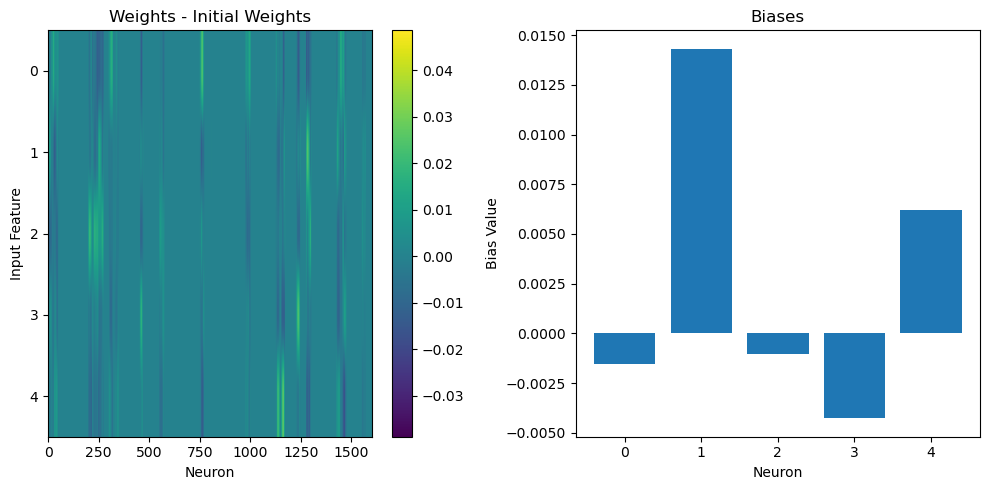

Weights : [[ 0.00939002 -0.00467906 -0.0008757  ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02590548  0.02267407 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.0054327   0.00940592 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.01201878 -0.00565151 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.01262879 -0.00259237 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00091578  0.0125197  -0.00123505 -0.00543502  0.00875659]
Difference of initial vs adaptated weights in norm : 0.4765174090862274


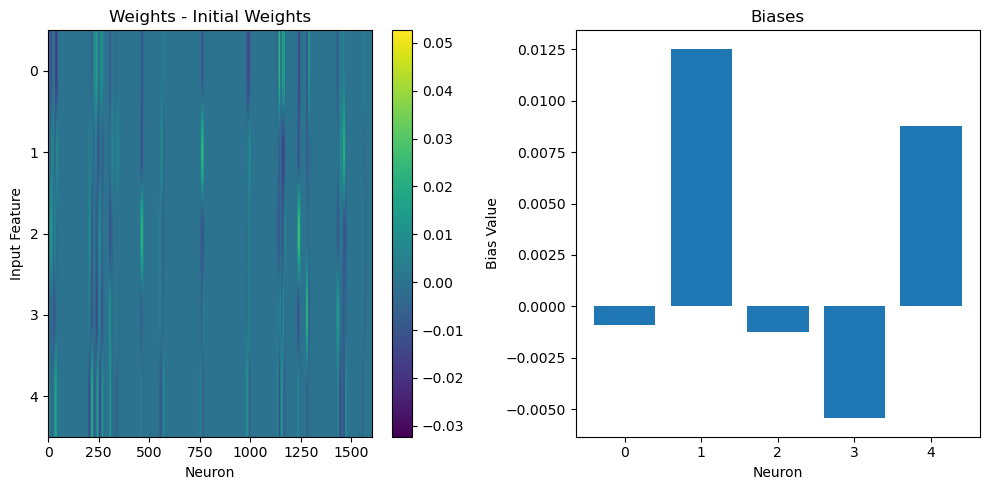

Weights : [[ 0.00939002 -0.00963051 -0.00130216 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02318115  0.01293409 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00277187  0.00621607 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00272282 -0.00489159 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206  0.00700376  0.01000401 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00037769  0.01321339  0.00025511 -0.00441035  0.00500999]
Difference of initial vs adaptated weights in norm : 0.49292927980422974


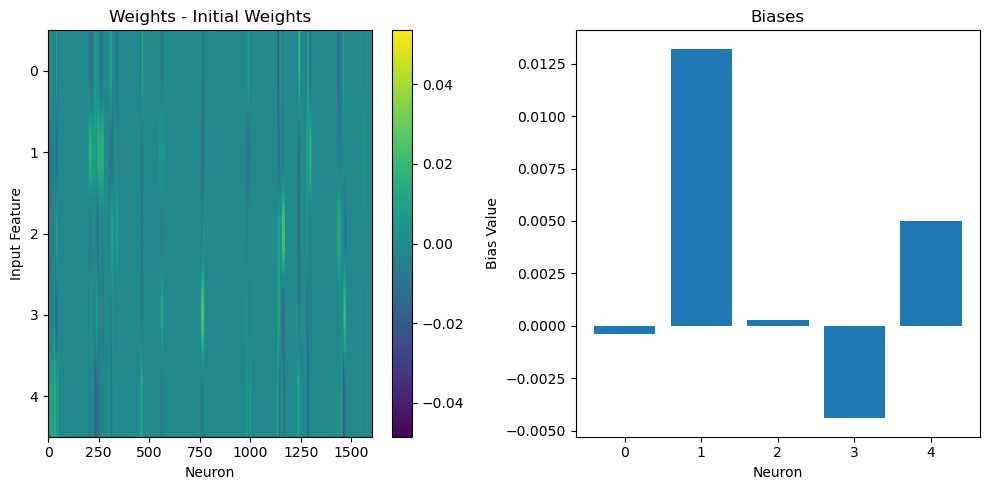

Weights : [[ 8.42326693e-03 -6.02808781e-03 -2.01930525e-03 ...  3.43487859e-02
   1.57753956e-02  5.96404914e-03]
 [-2.15598103e-02  2.95120087e-02  1.78195518e-02 ...  7.87400641e-03
  -1.92666613e-03  4.38102521e-03]
 [ 1.31457485e-02  1.53135844e-02  1.68510824e-02 ... -3.89373023e-03
  -2.74803825e-02  1.64760053e-02]
 [-2.05330760e-03  5.19532732e-05 -6.50731800e-03 ... -8.01203623e-02
  -2.63443254e-02 -1.94294360e-02]
 [-5.29546523e-03 -1.28003731e-02 -3.18359211e-03 ...  5.74416202e-03
  -1.37962895e-02 -1.37804877e-02]]
Biases : [-0.00181211  0.01026865 -0.00075419 -0.00165207  0.00764016]
Difference of initial vs adaptated weights in norm : 0.4499804377555847


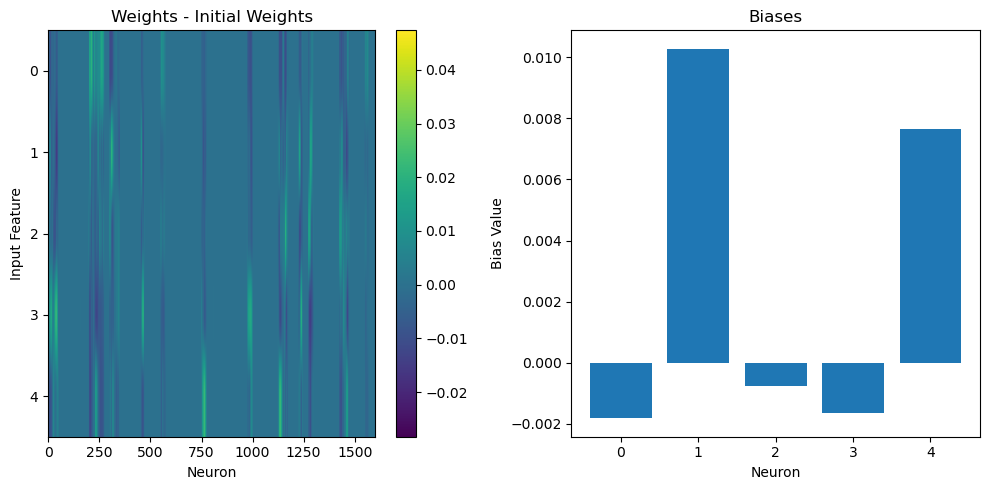

Weights : [[ 0.00939002  0.00999679  0.01494121 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.01816597  0.00992068 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942 -0.00559084 -0.00040559 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.01590613  0.0004679  ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.01242896 -0.00196377 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00292187  0.01796062 -0.00039642 -0.00623934  0.00528744]
Difference of initial vs adaptated weights in norm : 0.49345648288726807


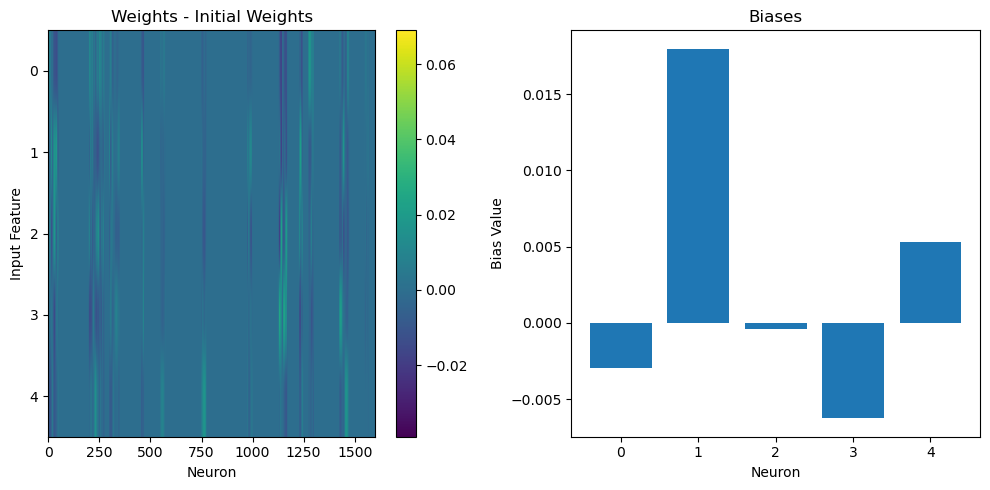

Weights : [[ 0.00939002 -0.00426018  0.00249083 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02493693  0.01433706 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.01094837  0.01234707 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.00207944 -0.00978083 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.00765547  0.00356628 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00206856  0.014126   -0.00079039 -0.00508746  0.00751086]
Difference of initial vs adaptated weights in norm : 0.4554470181465149


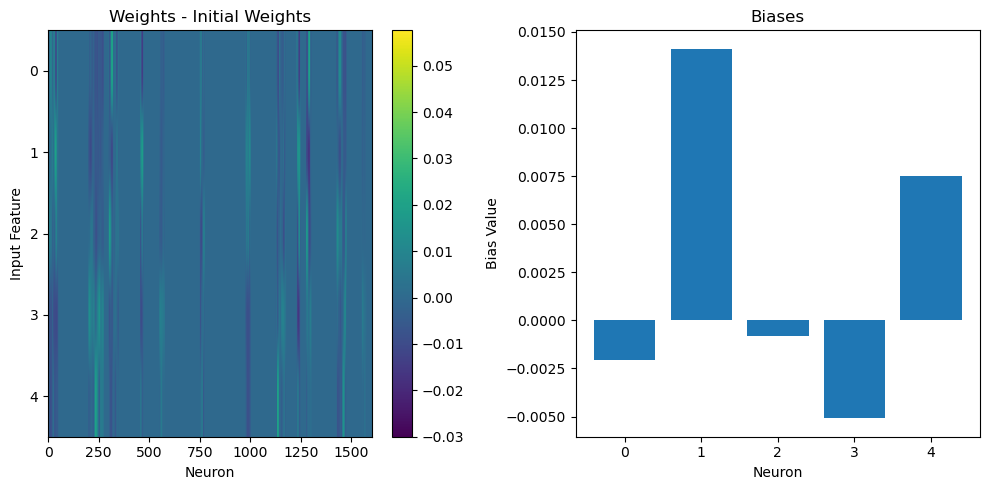

Weights : [[ 0.00939002 -0.00183452  0.00151301 ...  0.03434879  0.0157754
   0.00596405]
 [-0.0199931   0.02261205  0.01142751 ...  0.00787401 -0.00192667
   0.00438103]
 [ 0.00847942  0.00381379  0.00408791 ... -0.00389373 -0.02748038
   0.01647601]
 [-0.00104385  0.0033048   0.00246402 ... -0.08012036 -0.02634433
  -0.01942944]
 [-0.00417206 -0.00184703  0.00346797 ...  0.00574416 -0.01379629
  -0.01378049]]
Biases : [-0.00178357  0.01327184  0.00263326 -0.00562425  0.00519316]
Difference of initial vs adaptated weights in norm : 0.49118372797966003


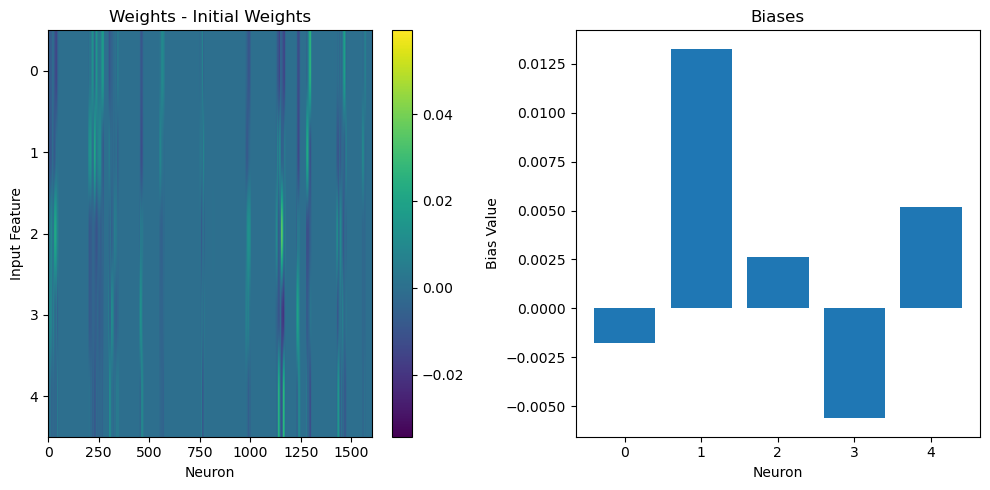

Average accuracy : 55.47777777777776


In [9]:
correct =0
count = 0
acc_all = []

iter_num = len(novel_loader) 
for i, (x,_) in enumerate(novel_loader):
    model.n_way = 5
    model.n_support = 1 # 1 shot learning
    model.n_query = x.size(1) - model.n_support

    # Specialization :
    #x_support = x[:,:n_support,:,:,:].contiguous().view(n_way * (n_support), *x.size()[2:]).cuda()
    #z_batch = feature.forward(x_support)
    #_, transformations =  self.fiveoutputs_3rd_spe(z_batch)
    #transformations = self.random_shuffle()
    #sorted_x = x.clone()
    #for (rd_class, rd_elemt) in transformations.items():
    #    x[rd_class:rd_class+1] = sorted_x[rd_elemt:rd_elemt+1]

    x = x.to(device)
    x_var = Variable(x)
    x_a_i = x_var[:,:model.n_support,:,:,:].contiguous().view( model.n_way* model.n_support, *x.size()[2:]) #support data 
    x_b_i = x_var[:,model.n_support:,:,:,:].contiguous().view( model.n_way* model.n_query,   *x.size()[2:]) #query data
    y_a_i = Variable( torch.from_numpy( np.repeat(range( model.n_way ), model.n_support ) )).to(device) #label for support data

    fast_parameters = list(model.parameters()) #the first gradient calcuated in line 45 is based on original weight
    for weight in model.parameters():
        weight.fast = None
    model.zero_grad()
    
    initial_weights = fast_parameters[-2].detach().cpu().numpy()
    prev_weights = initial_weights
    for task_step in range(model.task_update_num):
        scores = model.forward(x_a_i)
        set_loss = model.loss_fn( scores, y_a_i) 
        grad = torch.autograd.grad(set_loss, fast_parameters, create_graph=True) #build full graph support gradient of gradient
        if model.approx:
            grad = [ g.detach()  for g in grad ] #do not calculate gradient of gradient if using first order approximation
        fast_parameters = []
        for k, (name, weight) in enumerate(model.named_parameters()):
            #for usage of weight.fast, please see Linear_fw, Conv_fw in backbone.py 
            if weight.fast is None:
                weight.fast = weight - model.train_lr * grad[k] #create weight.fast 
            else:
                weight.fast = weight.fast - model.train_lr * grad[k] #create an updated weight.fast, note the '-' is not merely minus value, but to create a new weight.fast 
            fast_parameters.append(weight.fast) #gradients calculated in line 45 are based on newest fast weight, but the graph will retain the link to old weight.fasts
         
        if task_step % 33 ==0:
            weights = fast_parameters[-2].detach().cpu().numpy()
            biases = fast_parameters[-1].detach().cpu().numpy()
            
            #print(np.linalg.norm(weights - prev_weights))
            #print(biases)
            prev_weights = weights

    if i%50==0:
        # Extract the weight and bias
        weights = fast_parameters[-2].detach().cpu().numpy()
        biases = fast_parameters[-1].detach().cpu().numpy()
        print(f"Weights : {weights}")
        print(f"Biases : {biases}")
        
        print(f"Difference of initial vs adaptated weights in norm : {np.linalg.norm(weights - initial_weights)}")
        # Visualize the weights
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Weights - Initial Weights")
        plt.imshow(weights - initial_weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.xlabel("Neuron")
        plt.ylabel("Input Feature")

        # Visualize the biases
        plt.subplot(1, 2, 2)
        plt.title("Biases")
        plt.bar(range(len(biases)), biases)
        plt.xlabel("Neuron")
        plt.ylabel("Bias Value")

        plt.tight_layout()
        plt.show()

    scores = model.forward(x_b_i)
    y_query = np.repeat(range( model.n_way ), model.n_query )

    topk_scores, topk_labels = scores.data.topk(1, 1, True, True)
    topk_ind = topk_labels.cpu().numpy()
    top1_correct = np.sum(topk_ind[:,0] == y_query)
    correct_this, count_this = float(top1_correct), len(y_query)

    acc_all.append(correct_this/ count_this *100 )
    
print(f"Average accuracy : {sum(acc_all)/len(acc_all)}")

We observe that most of the time some neurons change for adaptation while the other one stay the same. We can hypothesize that this means that there exists specialized neurons that tends to change a lot, only for adapting to features specific of each class, while the others remain common knowledge about the task distribution

# Rate of change in last layer weights with adaptation

In [18]:
def average_cos_angle(inner_prod):
    """
    Computes the average angle between features of a 2D tensor, knowing we already have the normalized inner product
    """
    num_features = inner_prod.shape[0]
    upper_triangular = np.triu(inner_prod, k=1)
    average_cos_angle = upper_triangular.sum()/(num_features * (num_features-1))*2
    return average_cos_angle

In [19]:
# Creating a dict of original params
original_parameters = {name: param.clone() for name, param in model.named_parameters()}

Number of adaptation : 1
Difference of initial vs adaptated weights in norm : 0.11625164747238159
Average cos(angle) in last layers weights : -0.24416544437408447
Average cos(angle) in last layers weights and biases : -0.2319028615951538


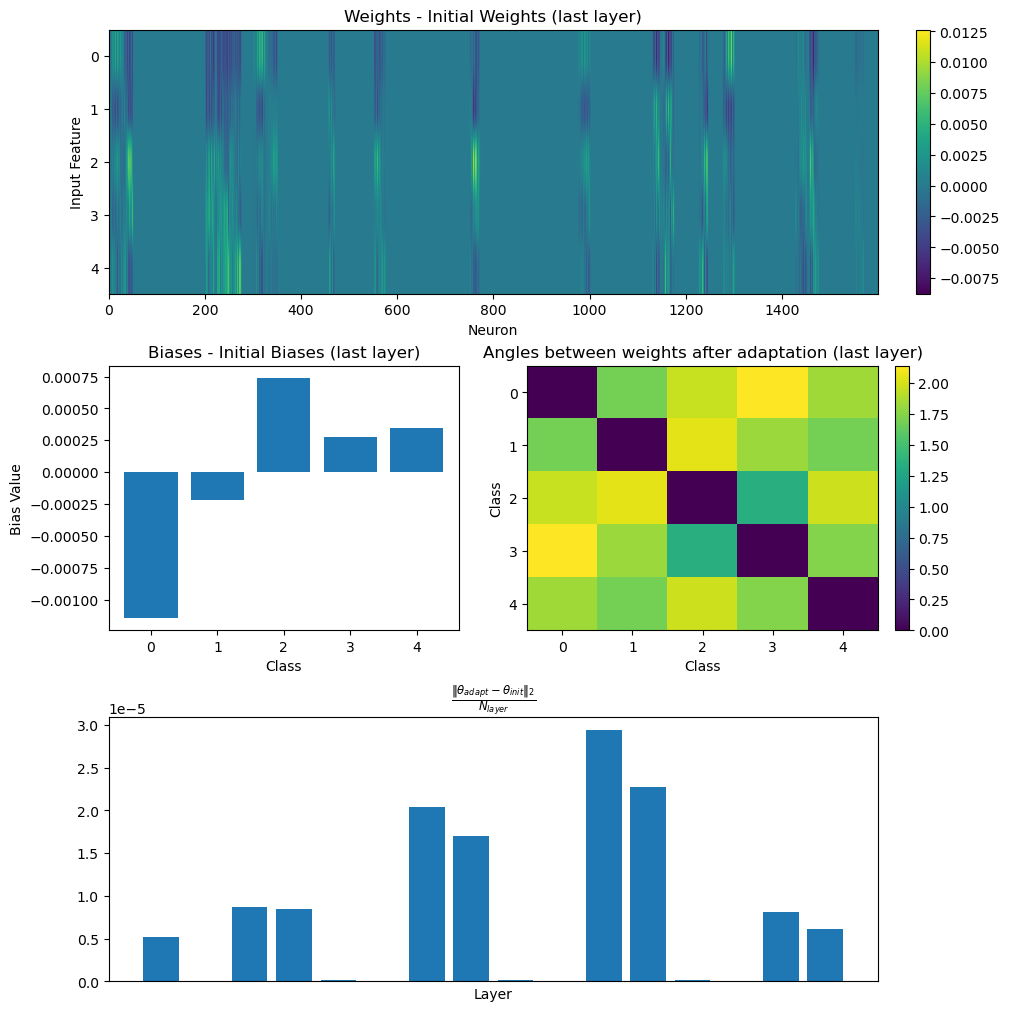

Average accuracy : 46.00444444444445
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.025986647605895995
Average norm of adapted weights - initial weights (last layer) : 0.12993323802947998
Standard deviation of norm of adapted weights - initial weights : 0.00911738071590662
Average angle of last weights : -0.23908808535337447
Standard deviation of angle of last weights : 0.007098921331340018
Average angle of last weights + biases : -0.22078010457754133
Standard deviation of angle of last weights + biases : 0.00987115896910869
Average Norm of the Network params before last layer : 1.0951783515111847e-07
Standard deviation of Norm of the Network params before last layer : 1.0951783515111847e-07




Number of adaptation : 2
Difference of initial vs adaptated weights in norm : 0.16074047982692719
Average cos(angle) in last layers weights : -0.24673471450805665
Average cos(angle) in last layers weights and biases : -0.2462149

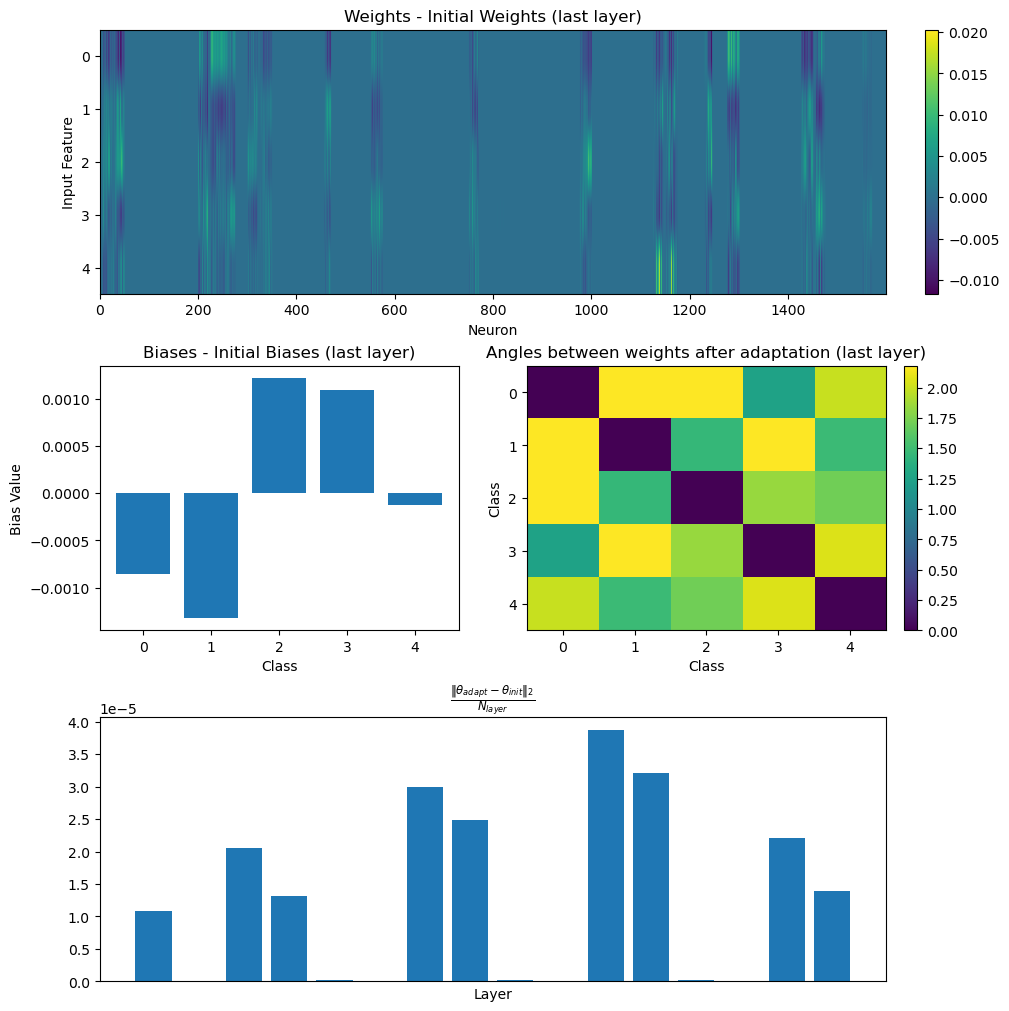

Average accuracy : 49.60222222222222
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.035270461440086366
Average norm of adapted weights - initial weights (last layer) : 0.17635230720043182
Standard deviation of norm of adapted weights - initial weights : 0.008774509653449059
Average angle of last weights : -0.24596342476209002
Standard deviation of angle of last weights : 0.002775371797870805
Average angle of last weights + biases : -0.2109961842695872
Standard deviation of angle of last weights + biases : 0.008855447563035744
Average Norm of the Network params before last layer : 1.623713182622925e-07
Standard deviation of Norm of the Network params before last layer : 1.623713182622925e-07




Number of adaptation : 3
Difference of initial vs adaptated weights in norm : 0.19993023574352264
Average cos(angle) in last layers weights : -0.24932754039764404
Average cos(angle) in last layers weights and biases : -0.24839777

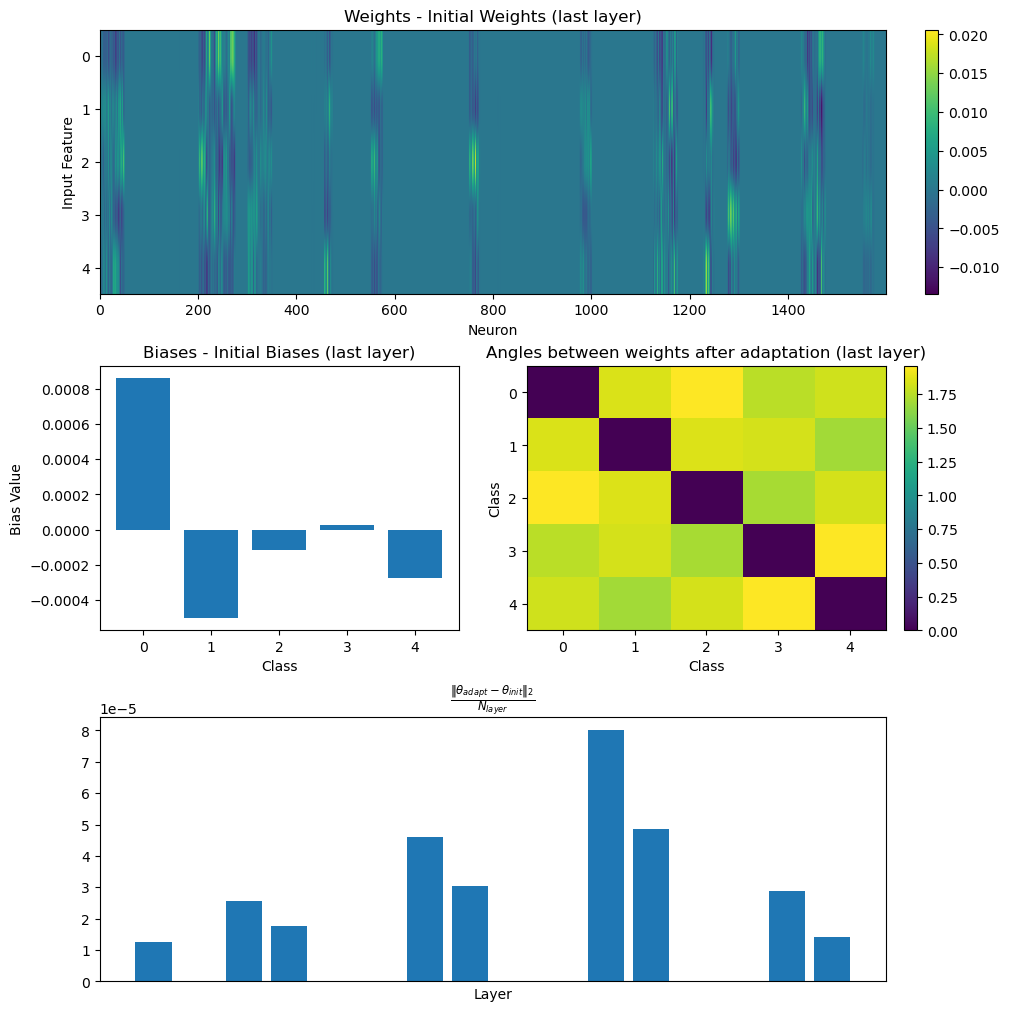

Average accuracy : 51.56518518518526
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.0422543853521347
Average norm of adapted weights - initial weights (last layer) : 0.21127192676067352
Standard deviation of norm of adapted weights - initial weights : 0.008165333420038223
Average angle of last weights : -0.24792513326803842
Standard deviation of angle of last weights : 0.0014663456580631966
Average angle of last weights + biases : -0.20916457869609198
Standard deviation of angle of last weights + biases : 0.006942385467218566
Average Norm of the Network params before last layer : 2.012306728598466e-07
Standard deviation of Norm of the Network params before last layer : 2.012306728598466e-07




Number of adaptation : 5
Difference of initial vs adaptated weights in norm : 0.24754102528095245
Average cos(angle) in last layers weights : -0.2491391658782959
Average cos(angle) in last layers weights and biases : -0.246600103

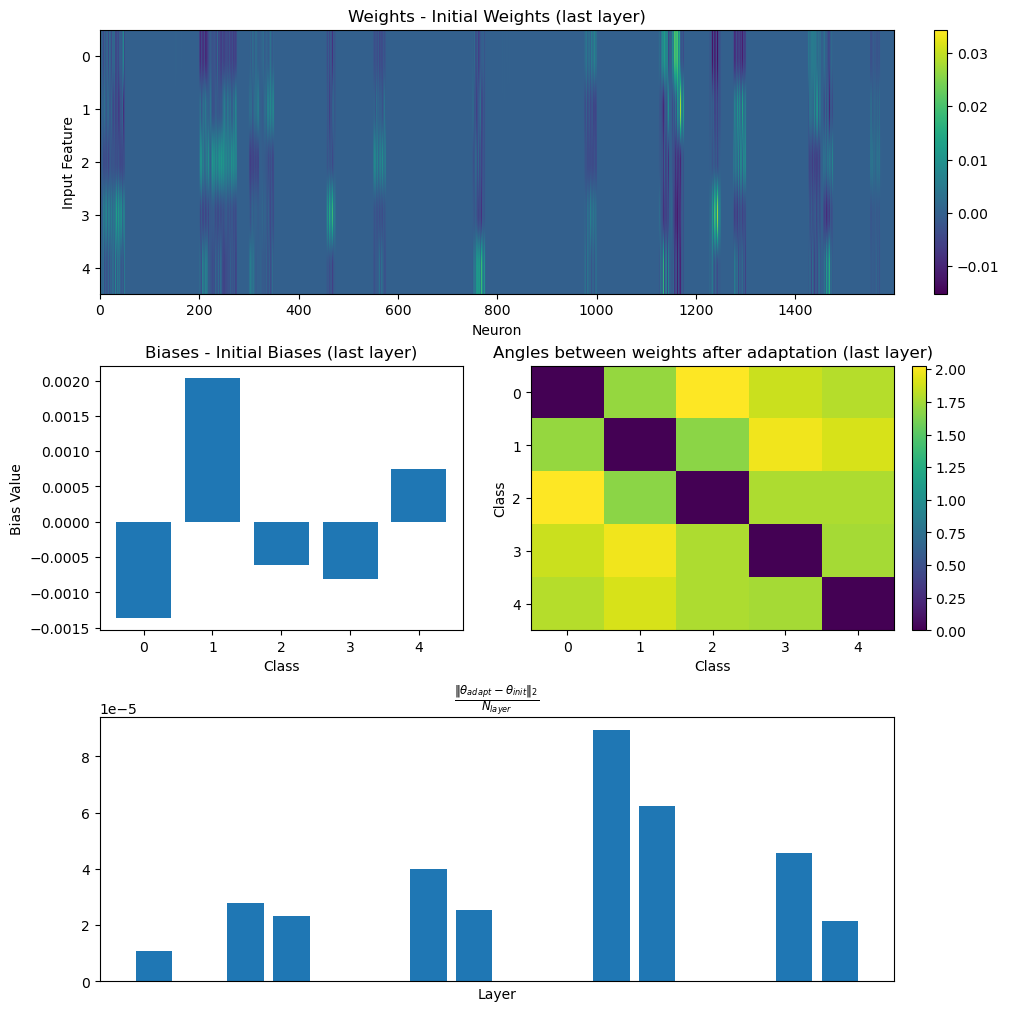

Average accuracy : 52.71500000000004
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.050410157442092894
Average norm of adapted weights - initial weights (last layer) : 0.2520507872104645
Standard deviation of norm of adapted weights - initial weights : 0.008491924032568932
Average angle of last weights : -0.24892578832308448
Standard deviation of angle of last weights : 0.0007151783010852599
Average angle of last weights + biases : -0.20564993649721144
Standard deviation of angle of last weights + biases : 0.00553286448524505
Average Norm of the Network params before last layer : 2.618874186081831e-07
Standard deviation of Norm of the Network params before last layer : 2.618874186081831e-07




Number of adaptation : 10
Difference of initial vs adaptated weights in norm : 0.30185529589653015
Average cos(angle) in last layers weights : -0.2495204448699951
Average cos(angle) in last layers weights and biases : -0.24864823

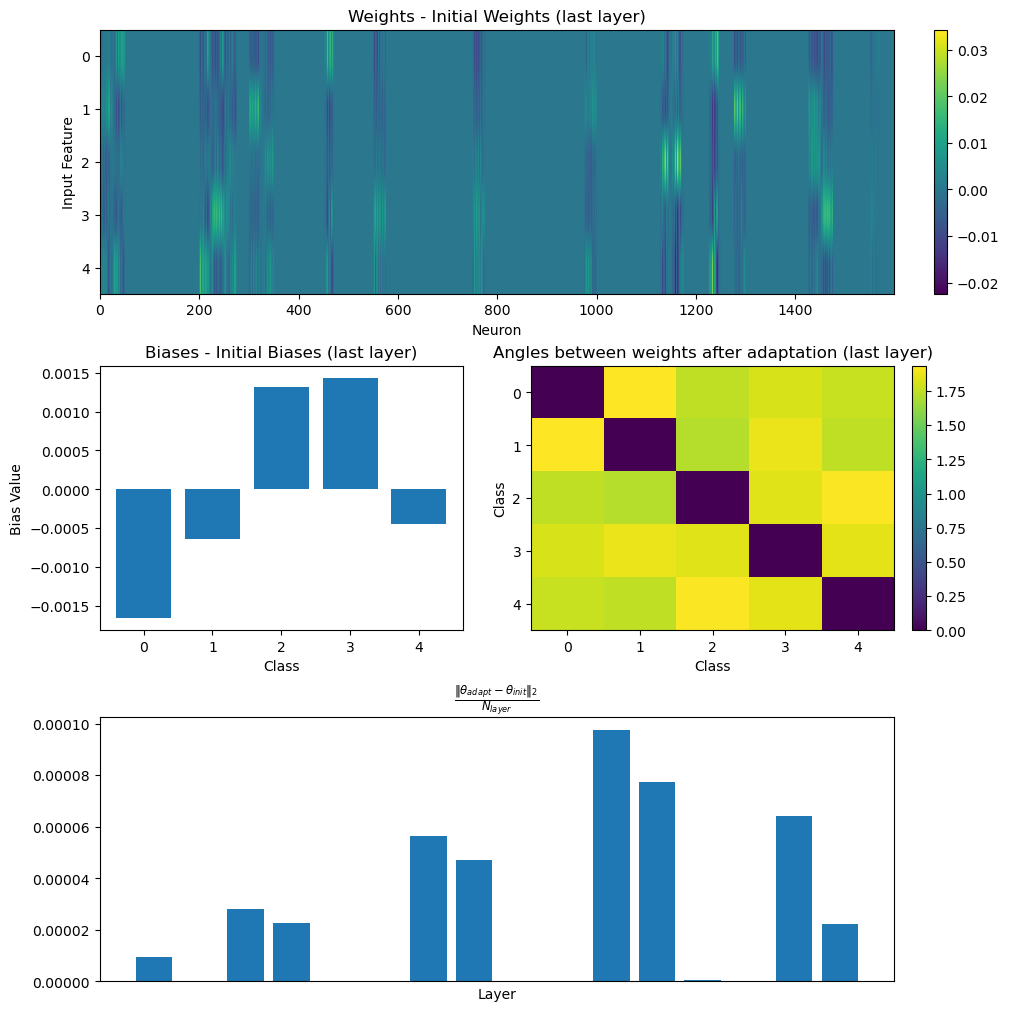

Average accuracy : 53.34400000000006
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.06134541034698486
Average norm of adapted weights - initial weights (last layer) : 0.3067270517349243
Standard deviation of norm of adapted weights - initial weights : 0.010791008360683918
Average angle of last weights : -0.24909352974096938
Standard deviation of angle of last weights : 0.0007502083430939471
Average angle of last weights + biases : -0.20220805197954178
Standard deviation of angle of last weights + biases : 0.004214611040080347
Average Norm of the Network params before last layer : 3.5986157158090846e-07
Standard deviation of Norm of the Network params before last layer : 3.5986157158090846e-07




Number of adaptation : 20
Difference of initial vs adaptated weights in norm : 0.3544456660747528
Average cos(angle) in last layers weights : -0.2495668888092041
Average cos(angle) in last layers weights and biases : -0.2496456

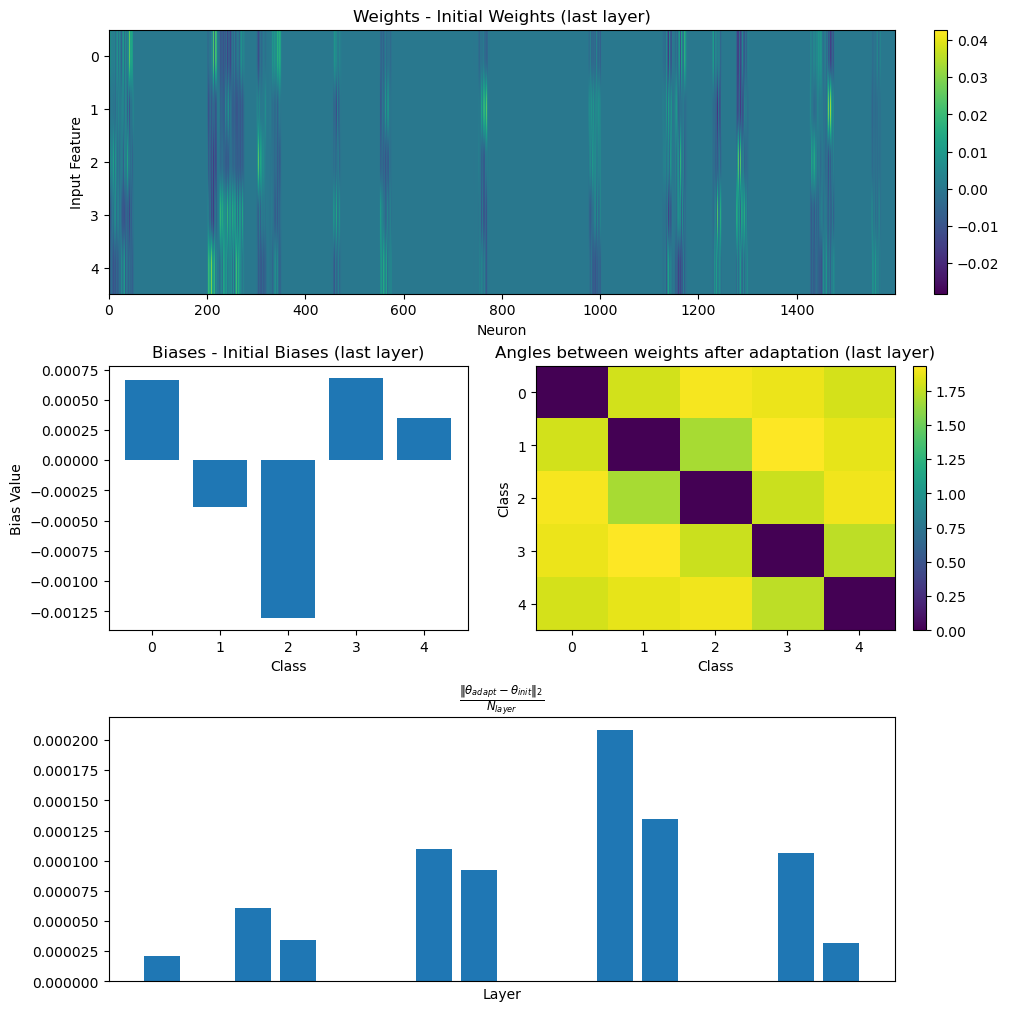

Average accuracy : 53.82962962962974
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.07186079621315003
Average norm of adapted weights - initial weights (last layer) : 0.3593039810657501
Standard deviation of norm of adapted weights - initial weights : 0.013278246857225895
Average angle of last weights : -0.24880658968289693
Standard deviation of angle of last weights : 0.0009716020366541543
Average angle of last weights + biases : -0.19979960542917252
Standard deviation of angle of last weights + biases : 0.0036188319911710704
Average Norm of the Network params before last layer : 4.6656813455467633e-07
Standard deviation of Norm of the Network params before last layer : 4.6656813455467633e-07




Number of adaptation : 50
Difference of initial vs adaptated weights in norm : 0.4113558828830719
Average cos(angle) in last layers weights : -0.24717671871185304
Average cos(angle) in last layers weights and biases : -0.24641

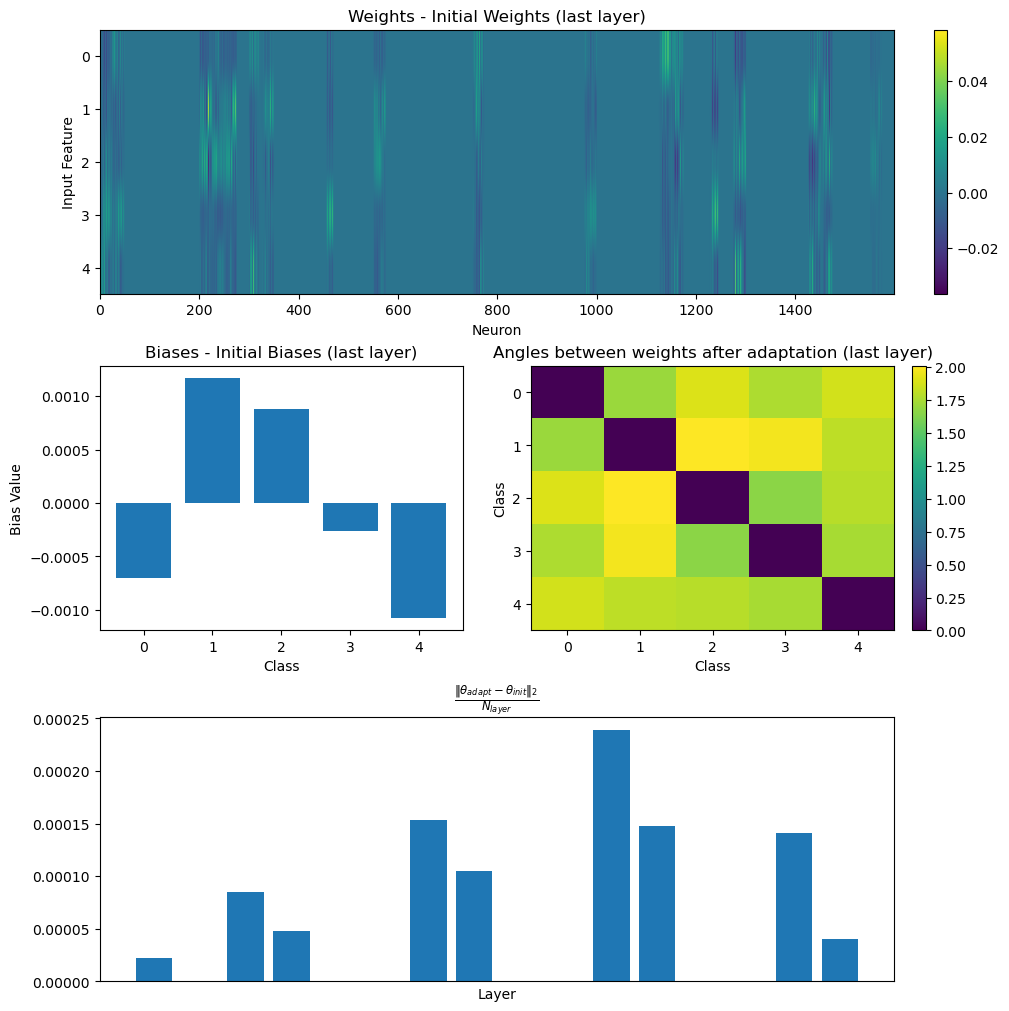

Average accuracy : 54.04571428571442
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.08507323265075684
Average norm of adapted weights - initial weights (last layer) : 0.4253661632537842
Standard deviation of norm of adapted weights - initial weights : 0.018042342737317085
Average angle of last weights : -0.24849524839719137
Standard deviation of angle of last weights : 0.0010562713435743989
Average angle of last weights + biases : -0.1977497878074646
Standard deviation of angle of last weights + biases : 0.003747124805145429
Average Norm of the Network params before last layer : 6.345994762181702e-07
Standard deviation of Norm of the Network params before last layer : 6.345994762181702e-07




Number of adaptation : 100
Difference of initial vs adaptated weights in norm : 0.5168641209602356
Average cos(angle) in last layers weights : -0.24957778453826904
Average cos(angle) in last layers weights and biases : -0.24958143

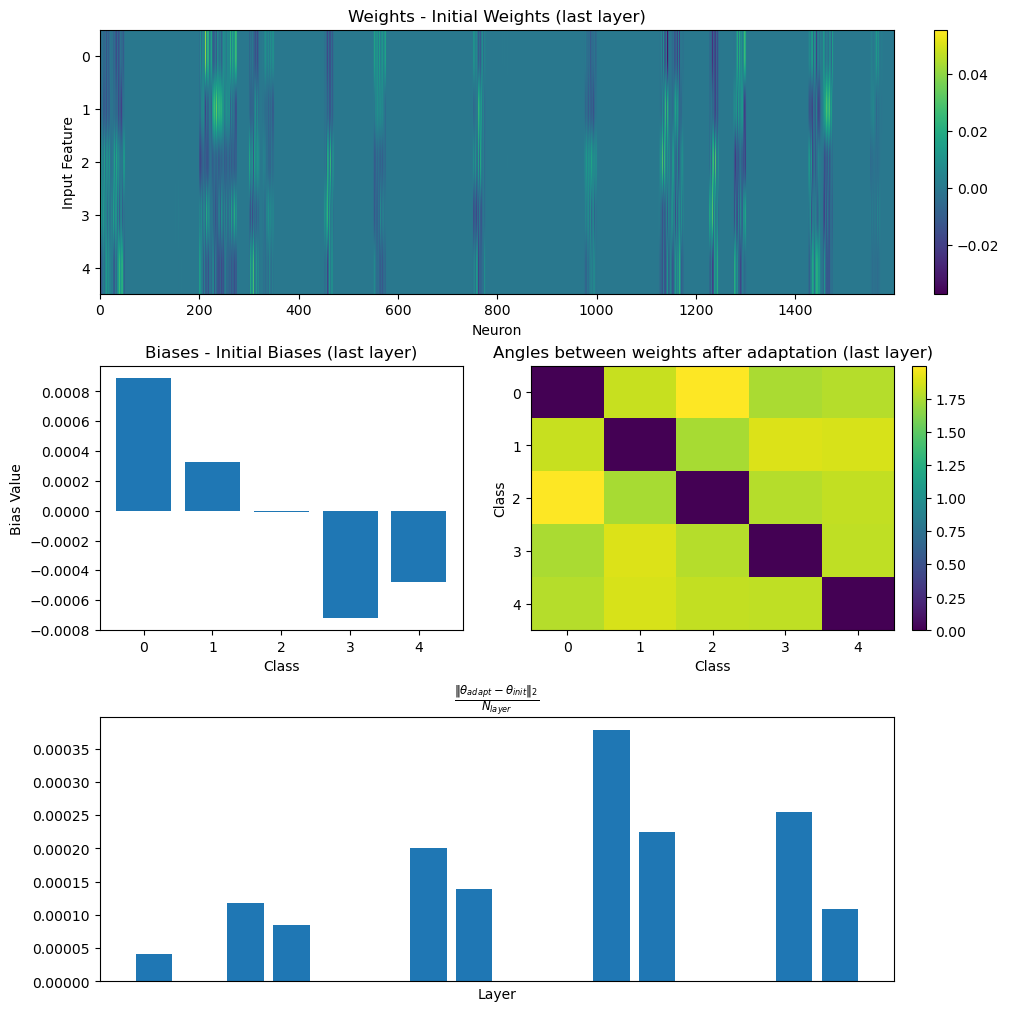

Average accuracy : 54.28361111111121
Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : 0.09490914940834046
Average norm of adapted weights - initial weights (last layer) : 0.47454574704170227
Standard deviation of norm of adapted weights - initial weights : 0.020151453092694283
Average angle of last weights : -0.24819022933642068
Standard deviation of angle of last weights : 0.0013016631914706516
Average angle of last weights + biases : -0.19661989788214365
Standard deviation of angle of last weights + biases : 0.003621322757881831
Average Norm of the Network params before last layer : 7.62154400494748e-07
Standard deviation of Norm of the Network params before last layer : 7.62154400494748e-07






In [21]:
correct =0
count = 0
acc_all = []

iter_num = len(novel_loader)
n_adapt_list = [1, 2, 3, 5, 10, 20, 50, 100]
avg_diff_param_adapt_norms = []
std_diff_param_adapt_norms = []
avg_diff_params_adapt_angles = []
std_diff_params_adapt_angles = []
avg_diff_params_adapt_angles_w_bias = []
std_diff_params_adapt_angles_w_bias = []
avg_diff_param_adapt_norms_prev_layers = []
std_diff_param_adapt_norms_prev_layers = []


for n_adapt in n_adapt_list:
    model.task_update_num = n_adapt
    diff_param_adapt_norms = []
    diff_params_adapt_angles = []
    diff_params_adapt_angles_w_bias = []
    diff_param_adapt_norms_prev_layers = []
    
    for i, (x,_) in enumerate(novel_loader):
        # Ensure that the params of the model are the meta-trained params :
        load_from_checkpoint(model, nn_model)
        
        model.n_way = 5
        model.n_support = 1 # 1 shot learning
        model.n_query = x.size(1) - model.n_support

        # Specialization :
        #x_support = x[:,:n_support,:,:,:].contiguous().view(n_way * (n_support), *x.size()[2:]).cuda()
        #z_batch = feature.forward(x_support)
        #_, transformations =  self.fiveoutputs_3rd_spe(z_batch)
        #transformations = self.random_shuffle()
        #sorted_x = x.clone()
        #for (rd_class, rd_elemt) in transformations.items():
        #    x[rd_class:rd_class+1] = sorted_x[rd_elemt:rd_elemt+1]

        x = x.cuda()
        x_var = Variable(x)
        x_a_i = x_var[:,:model.n_support,:,:,:].contiguous().view( model.n_way* model.n_support, *x.size()[2:]) #support data 
        x_b_i = x_var[:,model.n_support:,:,:,:].contiguous().view( model.n_way* model.n_query,   *x.size()[2:]) #query data
        y_a_i = Variable( torch.from_numpy( np.repeat(range( model.n_way ), model.n_support ) )).cuda() #label for support data

        fast_parameters = list(model.parameters()) #the first gradient calcuated in line 45 is based on original weight
        for weight in model.parameters():
            weight.fast = None
        model.zero_grad()

        initial_weights = fast_parameters[-2].detach().cpu().numpy()
        initial_biases = fast_parameters[-1].detach().cpu().numpy()
        reshape_initial_biases = np.expand_dims(initial_biases, axis=1)
        initial_weights_biases = np.concatenate((initial_weights, 50*reshape_initial_biases), axis=1)
        
        init_tot_params = {name: param.clone() for name, param in model.named_parameters()}
        
        init_flatten_params = [t.flatten() for t in fast_parameters[:-2]]
        init_flatten_fast_params = torch.cat(init_flatten_params)
        init_net_params = init_flatten_fast_params.detach().cpu().numpy()
        
        # Adaptation by finetuning
        for task_step in range(model.task_update_num):
            scores = model.forward(x_a_i)
            set_loss = model.loss_fn( scores, y_a_i) 
            grad = torch.autograd.grad(set_loss, fast_parameters, create_graph=True) #build full graph support gradient of gradient
            if model.approx:
                grad = [ g.detach()  for g in grad ] #do not calculate gradient of gradient if using first order approximation
            fast_parameters = []
            for k, (name, weight) in enumerate(model.named_parameters()):
                #for usage of weight.fast, please see Linear_fw, Conv_fw in backbone.py 
                if weight.fast is None:
                    weight.fast = weight - model.train_lr * grad[k] #create weight.fast 
                else:
                    weight.fast = weight.fast - model.train_lr * grad[k] #create an updated weight.fast, note the '-' is not merely minus value, but to create a new weight.fast 
                fast_parameters.append(weight.fast) #gradients calculated in line 45 are based on newest fast weight, but the graph will retain the link to old weight.fasts


        if i==iter_num-1:
            print("==================")
            print(f"Number of adaptation : {n_adapt}")
            print("==================")
            
            # Extract the weight and bias
            weights = fast_parameters[-2].detach().cpu().numpy()
            biases = fast_parameters[-1].detach().cpu().numpy()
            reshape_biases = np.expand_dims(biases, axis=1)
            weights_biases = np.concatenate((weights, 50*reshape_biases), axis=1)
            
            # Do the compute the norm of the change in all params in net :
            layer_names = []
            norm_diff_params = []
            for i, (name, param) in enumerate(init_tot_params.items()):
                layer_names.append(name)
                diff_params = (param - fast_parameters[i]).reshape(-1)
                norm_per_element = (torch.norm(diff_params, p=2) / diff_params.numel()) # We divide the norm 2 by the number of element of the layer, to be able to compare the mean change between different layers
                norm_diff_params.append(norm_per_element.detach().cpu().numpy())
            
            # print(f"Weights : {weights}")
            # print(f"Biases : {biases}")

            print(f"Difference of initial vs adaptated weights in norm : {np.linalg.norm(weights - initial_weights)}")
            row_norms = np.linalg.norm(weights - initial_weights, axis=1, keepdims=True)
            norm_tensor = (weights - initial_weights) / row_norms
            inner_prod = norm_tensor @ norm_tensor.T
            np.fill_diagonal(inner_prod, 1) # For approximation errors
            print(f"Average cos(angle) in last layers weights : {average_cos_angle(inner_prod)}")
            
            row_norms_w_bias = np.linalg.norm(weights_biases - initial_weights_biases, axis=1, keepdims=True)
            norm_tensor_w_bias = (weights_biases - initial_weights_biases) / row_norms_w_bias
            inner_prod_w_bias = norm_tensor_w_bias @ norm_tensor_w_bias.T
            np.fill_diagonal(inner_prod_w_bias, 1) # For approximation errors
            print(f"Average cos(angle) in last layers weights and biases : {average_cos_angle(inner_prod_w_bias)}")
            
            # Visualize the weights
            # Create a figure
            fig = plt.figure(figsize=(10, 10), constrained_layout=True)

            # Create a gridspec layout
            gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])
            
            ax1 = fig.add_subplot(gs[0, :])
            ax1.set_title("Weights - Initial Weights (last layer)")
            ax1.imshow(weights - initial_weights, aspect='auto', cmap='viridis')
            cax = ax1.imshow(weights - initial_weights, aspect='auto', cmap='viridis')
            fig.colorbar(cax, ax=ax1, orientation='vertical')
            ax1.set_xlabel("Neuron")
            ax1.set_ylabel("Input Feature")

            # Visualize the biases difference
            ax2 = fig.add_subplot(gs[1, 0])
            ax2.set_title("Biases - Initial Biases (last layer)")
            ax2.bar(range(len(biases)), biases - initial_biases)
            ax2.set_xlabel("Class")
            ax2.set_ylabel("Bias Value")

            ax3 = fig.add_subplot(gs[1, 1])
            ax3.set_title("Angles between weights after adaptation (last layer)")
            ax3.imshow(np.arccos(inner_prod), aspect='auto', cmap='viridis')
            cax = ax3.imshow(np.arccos(inner_prod), aspect='auto', cmap='viridis')
            fig.colorbar(cax, ax=ax3, orientation='vertical')
            ax3.set_xlabel("Class")
            ax3.set_ylabel("Class")
            
            #ax5 = fig.add_subplot(gs[2, 1])
            #ax5.set_title("Cosine of Angles between weights+biases after adaptation (last layer)")
            #ax5.imshow(inner_prod_w_bias, aspect='auto', cmap='viridis')
            #cax = ax5.imshow(inner_prod_w_bias, aspect='auto', cmap='viridis')
            #fig.colorbar(cax, ax=ax5, orientation='vertical')
            #ax5.set_xlabel("Class")
            #ax5.set_ylabel("Class")
            
            ax4 = fig.add_subplot(gs[2, :])
            ax4.set_title(r"$\frac{\| \theta_{adapt} - \theta_{init} \|_{2}}{N_{layer}}$")
            ax4.bar(layer_names[:-2], norm_diff_params[:-2])
            # Remove x-axis labels
            ax4.set_xticks([])
            ax4.set_xlabel("Layer")
            
            plt.savefig(f'{nn_model}-{n_adapt}-adaptations')
            plt.show()
        
        weights = fast_parameters[-2].detach().cpu().numpy()
        biases = fast_parameters[-1].detach().cpu().numpy()
        reshape_biases = np.expand_dims(biases, axis=1)
        weights_biases = np.concatenate((weights, reshape_biases), axis=1)
        diff_param_adapt_norms.append(np.linalg.norm(weights - initial_weights))

        # Angles
        row_norms = np.linalg.norm(weights - initial_weights, axis=1, keepdims=True)
        norm_tensor = (weights - initial_weights) / row_norms
        inner_prod = norm_tensor @ norm_tensor.T
        diff_params_adapt_angles.append(average_cos_angle(inner_prod))
        
        row_norms_w_bias = np.linalg.norm(weights_biases - initial_weights_biases, axis=1, keepdims=True)
        norm_tensor_w_bias = (weights_biases - initial_weights_biases) / row_norms_w_bias
        inner_prod_w_bias = norm_tensor_w_bias @ norm_tensor_w_bias.T
        diff_params_adapt_angles_w_bias.append(average_cos_angle(inner_prod_w_bias))
        
        # ALl net params
        flatten_params = [t.flatten() for t in fast_parameters[:-2]]
        flatten_fast_params = torch.cat(flatten_params)
        net_params = flatten_fast_params.detach().cpu().numpy()
        norm_prev_nn_params = np.linalg.norm(net_params - init_net_params) / net_params.size
        diff_param_adapt_norms_prev_layers.append(norm_prev_nn_params)
        
        # Accuracy
        scores = model.forward(x_b_i)
        y_query = np.repeat(range( model.n_way ), model.n_query )

        topk_scores, topk_labels = scores.data.topk(1, 1, True, True)
        topk_ind = topk_labels.cpu().numpy()
        top1_correct = np.sum(topk_ind[:,0] == y_query)
        correct_this, count_this = float(top1_correct), len(y_query)

        acc_all.append(correct_this/ count_this *100 )


    norm_array = np.array(diff_param_adapt_norms)
    angle_array = np.array(diff_params_adapt_angles)
    angle_array_w_bias = np.array(diff_params_adapt_angles_w_bias)
    tot_params_norm = np.array(diff_param_adapt_norms_prev_layers)
    
    avg_diff_param_adapt_norms.append( np.mean(norm_array) )
    std_diff_param_adapt_norms.append( np.std(norm_array) )
    avg_diff_params_adapt_angles.append( np.mean(angle_array) )
    std_diff_params_adapt_angles.append( np.std(angle_array) )
    avg_diff_params_adapt_angles_w_bias.append( np.mean(angle_array_w_bias) )
    std_diff_params_adapt_angles_w_bias.append( np.std(angle_array_w_bias) )
    avg_diff_param_adapt_norms_prev_layers.append( np.mean(tot_params_norm) )
    std_diff_param_adapt_norms_prev_layers.append( np.mean(tot_params_norm) )
    
    print(f"Average accuracy : {sum(acc_all)/len(acc_all)}")
    last_layer_weights_size = list(model.parameters())[-1].numel()
    print(f"Average norm of adapted weights - initial weights (last layer) devided by the number of weights in last layer : {avg_diff_param_adapt_norms[-1]/last_layer_weights_size}")
    print(f"Average norm of adapted weights - initial weights (last layer) : {avg_diff_param_adapt_norms[-1]}")
    print(f"Standard deviation of norm of adapted weights - initial weights : {std_diff_param_adapt_norms[-1]}") 
    print(f"Average angle of last weights : {avg_diff_params_adapt_angles[-1]}")
    print(f"Standard deviation of angle of last weights : {std_diff_params_adapt_angles[-1]}") 
    print(f"Average angle of last weights + biases : {avg_diff_params_adapt_angles_w_bias[-1]}")
    print(f"Standard deviation of angle of last weights + biases : {std_diff_params_adapt_angles_w_bias[-1]}") 
    print(f"Average Norm of the Network params before last layer : {avg_diff_param_adapt_norms_prev_layers[-1]}")
    print(f"Standard deviation of Norm of the Network params before last layer : {std_diff_param_adapt_norms_prev_layers[-1]}") 
   
    print("\n")
    print("\n")

ValueError: 'x' and 'y' must have the same size

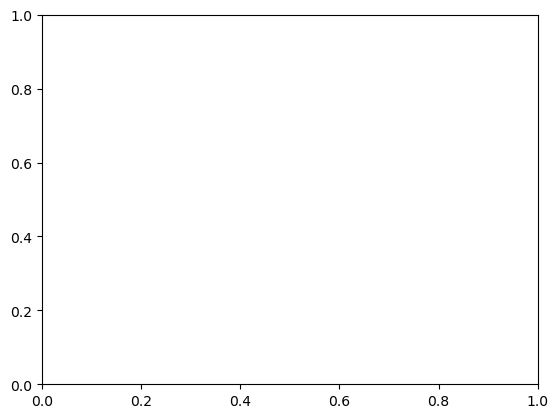

In [13]:
# Norm plot

plt.errorbar(n_adapt_list[:-1], avg_diff_param_adapt_norms, yerr=std_diff_param_adapt_norms, fmt='o', capsize=5, capthick=2, ecolor='red', label='Norm of adapted params - initial params plus std')

# Label the axes
plt.xlabel('Index')
plt.ylabel('Values')

# Add a title
plt.title('Norm of adapted params - initial params')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Plot the values with error bars on a semi-logarithmic scale (logarithmic x-axis)
plt.errorbar(n_adapt_list[:-1], avg_diff_param_adapt_norms, yerr=std_diff_param_adapt_norms, fmt='o', capsize=5, capthick=2, ecolor='red', label='Norm of adapted params - initial params plus std')
# Set the x-axis to logarithmic scale
plt.xscale('log')

# Label the axes
plt.xlabel('n_adapt (log scale)')
plt.ylabel('norm(adapt_params - initial_params)')

# Add a title
plt.title('norm(adapt_params - initial_params)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Define the square root function to fit
def log_curve(x, a, b):
    return a * np.log(x) + b

# Example data points (replace these with your actual data)
x_data = np.array(n_adapt_list[:-1])
y_data = np.array(avg_diff_param_adapt_norms)

# Fit the curve
params, covariance = curve_fit(log_curve, x_data, y_data)
a, b = params

# Generate fitted y values
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = log_curve(x_fit, a, b)

# Plot the original data points
plt.errorbar(n_adapt_list[:-1], avg_diff_param_adapt_norms, yerr=std_diff_param_adapt_norms, fmt='o', capsize=5, capthick=2, ecolor='red', label='Norm of adapted params - initial params')


# Plot the fitted curve
plt.plot(x_fit, y_fit, 'g--', label=f'Fitted Curve: $y = {a:.2f} log(x) + {b:.2f}$')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Add a title
plt.title('Curve Fitting')

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Angles of the weights of the last layer

In [ ]:
# Angles

plt.errorbar(n_adapt_list[:-1], avg_diff_params_adapt_angles, yerr=std_diff_params_adapt_angles, fmt='o', capsize=5, capthick=2, ecolor='red', label='Norm of adapted params - initial params plus std')

# Label the axes
plt.xlabel('Index')
plt.ylabel('Values')

# Add a title
plt.title('Norm of adapted params - initial params')

# Add a legend
plt.legend()

# Display the plot
plt.show()

# All the layers

In [ ]:
correct =0
count = 0
acc_all = []

iter_num = len(novel_loader)
n_adapt_list = [1, 2, 3, 5, 10, 20, 50, 100]
avg_diff_param_adapt_norms = []
std_diff_param_adapt_norms = []

for n_adapt in n_adapt_list:
    model.task_update_num = n_adapt
    diff_param_adapt_norms = []
    
    for i, (x,_) in enumerate(novel_loader):
        model.n_way = 5
        model.n_support = 1 # 1 shot learning
        model.n_query = x.size(1) - model.n_support

        # Specialization :
        #x_support = x[:,:n_support,:,:,:].contiguous().view(n_way * (n_support), *x.size()[2:]).cuda()
        #z_batch = feature.forward(x_support)
        #_, transformations =  self.fiveoutputs_3rd_spe(z_batch)
        #transformations = self.random_shuffle()
        #sorted_x = x.clone()
        #for (rd_class, rd_elemt) in transformations.items():
        #    x[rd_class:rd_class+1] = sorted_x[rd_elemt:rd_elemt+1]

        x = x.cuda()
        x_var = Variable(x)
        x_a_i = x_var[:,:model.n_support,:,:,:].contiguous().view( model.n_way* model.n_support, *x.size()[2:]) #support data 
        x_b_i = x_var[:,model.n_support:,:,:,:].contiguous().view( model.n_way* model.n_query,   *x.size()[2:]) #query data
        y_a_i = Variable( torch.from_numpy( np.repeat(range( model.n_way ), model.n_support ) )).cuda() #label for support data

        fast_parameters = list(model.parameters()) #the first gradient calcuated in line 45 is based on original weight
        for weight in model.parameters():
            weight.fast = None
        model.zero_grad()
        
        flatten_params = [t.flatten() for t in fast_parameters[:-2]]
        flatten_fast_params = torch.cat(flatten_params)
        initial_weights = flatten_fast_params.detach().cpu().numpy()
        prev_weights = initial_weights
        for task_step in range(model.task_update_num):
            scores = model.forward(x_a_i)
            set_loss = model.loss_fn( scores, y_a_i) 
            grad = torch.autograd.grad(set_loss, fast_parameters, create_graph=True) #build full graph support gradient of gradient
            if model.approx:
                grad = [ g.detach()  for g in grad ] #do not calculate gradient of gradient if using first order approximation
            fast_parameters = []
            for k, (name, weight) in enumerate(model.named_parameters()):
                #for usage of weight.fast, please see Linear_fw, Conv_fw in backbone.py 
                if weight.fast is None:
                    weight.fast = weight - model.train_lr * grad[k] #create weight.fast 
                else:
                    weight.fast = weight.fast - model.train_lr * grad[k] #create an updated weight.fast, note the '-' is not merely minus value, but to create a new weight.fast 
                fast_parameters.append(weight.fast) #gradients calculated in line 45 are based on newest fast weight, but the graph will retain the link to old weight.fasts

            if task_step % 33 ==0:
                weights = fast_parameters[-2].detach().cpu().numpy()
                biases = fast_parameters[-1].detach().cpu().numpy()

                #print(np.linalg.norm(weights - prev_weights))
                #print(biases)
                prev_weights = weights

        if i==iter_num-1:
            print("==================")
            print(f"Number of adaptation : {n_adapt}")
            print("==================")
            
            flatten_params = [t.flatten() for t in fast_parameters[:-2]]
            flatten_fast_params = torch.cat(flatten_params)
            weights = flatten_fast_params.detach().cpu().numpy()
            print(f"Weights : {weights}")

            print(f"Difference of initial vs adaptated weights in norm : {np.linalg.norm(weights - initial_weights)}")
            # Visualize the weights
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 1, 1)
            plt.title("Weights - Initial Weights")
            indices = range(len(weights - initial_weights))
            plt.bar(indices, weights - initial_weights, color='blue')
            plt.xlabel("Neuron")
            plt.ylabel("Input Feature")

            plt.tight_layout()
            plt.show()
        
        flatten_params = [t.flatten() for t in fast_parameters[:-2]]
        flatten_fast_params = torch.cat(flatten_params)
        weights = flatten_fast_params.detach().cpu().numpy()
        diff_param_adapt_norms.append(np.linalg.norm(weights - initial_weights))
        
        scores = model.forward(x_b_i)
        y_query = np.repeat(range( model.n_way ), model.n_query )

        topk_scores, topk_labels = scores.data.topk(1, 1, True, True)
        topk_ind = topk_labels.cpu().numpy()
        top1_correct = np.sum(topk_ind[:,0] == y_query)
        correct_this, count_this = float(top1_correct), len(y_query)

        acc_all.append(correct_this/ count_this *100 )

    
    data_array = np.array(diff_param_adapt_norms)
    avg_diff_param_adapt_norms.append( np.mean(data_array) )
    std_diff_param_adapt_norms.append( np.std(data_array) )

    print(f"Average accuracy : {sum(acc_all)/len(acc_all)}")
    print(f"Average norm of adapted param - initial params : {avg_diff_param_adapt_norms[-1]}")
    print(f"Standart deviation of norm of adapted param - initial params : {std_diff_param_adapt_norms[-1]}")    
    

plt.errorbar(n_adapt_list, avg_diff_param_adapt_norms, yerr=std_diff_param_adapt_norms, fmt='o', capsize=5, capthick=2, ecolor='red', label='Norm of adapted params - initial params plus std')

# Label the axes
plt.xlabel('Index')
plt.ylabel('Values')

# Add a title
plt.title('Norm of adapted params - initial params')

# Add a legend
plt.legend()

# Display the plot
plt.show()

The hidden layers follow the same trend in the norm as the finallayer does. But the final layer's norm is one order of magnetude higher, and so even though hidden layers have approximatly $120,000$ params and last layer only have $5 \times 1600 \approx 10,000$ params. This shows that adaptation is primarely changing task-specific features, by finding the closest recognizable feature in the parameter space. Thus, hidden layers being common knowledge between classes doesn't change that much, because it was already partially learned during meta-training.

# Sketching eigenvalues / eigenvectors of FIM (approximation of Hessian)

Print the ntk of last layer plus hidden layers but in different graphs

In [ ]:
from projection import proj_sketch

batches = []
labels = []
subspacedim = 20
nb_batch_proj = 10  # Number of tasks used for FIM computation

for i, (x,_) in enumerate(novel_loader):
    model.n_way = 5
    model.n_support = 1 # 1 shot learning
    model.n_query = x.size(1) - model.n_support

    x = x.cuda()
    x_var = Variable(x)
    batch = x_var[:,:,:,:,:].contiguous().view( model.n_way* (model.n_support + model.n_query), *x.size()[2:]) #support data 
    label = Variable( torch.from_numpy( np.repeat(range( model.n_way ), model.n_support + model.n_query ) )).cuda() #label for support data

    fast_parameters = list(model.parameters()) #the first gradient calcuated in line 45 is based on original weight
    for weight in model.parameters():
        weight.fast = None
    model.zero_grad()

    batches.append(batch)  
    if i == nb_batch_proj:
        break

batches = torch.stack(batches)
# FIM projection computation
input_dimension = sum(p.numel() for p in model.parameters())
for c in range(5):
    P = proj_sketch(nn.Sequential(model.feature, model.classifier), batches, subspacedim, c).cuda()